In [3]:
from satelite_data_preporation_field_scale import collection
import ee 
import geemap
ee.Initialize()
%load_ext autoreload

In [4]:
%autoreload 2

In [7]:
begin = '2020-10-16'
end =  '2021-10-15'
two_fields = 'vector_data/archangelskoe_TWO_FIELDS_WGS84.geojson'
region_boundary = 'vector_data/budenovsk_district_boundaries.geojson'
region_of_interest = 'vector_data/our_fields_for_animation.geojson'
url = "https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%91%D1%83%D0%B4%D0%B5%D0%BD%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B5"

In [6]:
total_collection = collection(begin , end)


In [7]:
total_collection.get_sattelit_collection('sentinel2',region_boundary, region_of_interest)

In [9]:
total_collection.DownloadImages()




file Field_scale_sentinel2_2020-10-16_scene.tif alredy exists
file Field_scale_sentinel2_2020-10-21_scene.tif alredy exists
file Field_scale_sentinel2_2021-01-19_scene.tif alredy exists
file Field_scale_sentinel2_2021-03-05_scene.tif alredy exists
file Field_scale_sentinel2_2021-03-30_scene.tif alredy exists
file Field_scale_sentinel2_2021-04-04_scene.tif alredy exists
file Field_scale_sentinel2_2021-04-29_scene.tif alredy exists
file Field_scale_sentinel2_2021-05-14_scene.tif alredy exists
file Field_scale_sentinel2_2021-05-24_scene.tif alredy exists
file Field_scale_sentinel2_2021-05-29_scene.tif alredy exists
file Field_scale_sentinel2_2021-06-03_scene.tif alredy exists
file Field_scale_sentinel2_2021-06-08_scene.tif alredy exists
file Field_scale_sentinel2_2021-06-23_scene.tif alredy exists
file Field_scale_sentinel2_2021-07-03_scene.tif alredy exists
file Field_scale_sentinel2_2021-07-08_scene.tif alredy exists
file Field_scale_sentinel2_2021-07-13_scene.tif alredy exists
file Fie

In [12]:
total_collection.anual_ndvi(two_fields)

file anual_data//NDVI//NDVI_modis.csv alredy exists
Generating URL ...
Please wait ...
Data downloaded to c:\Users\ermolaevNR\Google Диск\python_notebooks\Archangelskiy_project\field_scale\anual_data\NDVI\row_data.csv


,type,Dates,NDVI
0,PP,2018_09_30,0.2248
1,TT,2018_09_30,0.2156
2,PP,2018_10_16,0.2257
3,TT,2018_10_16,0.2139
4,PP,2018_11_01,0.2551
...,...,...,...
35,TT,2021_07_28,0.1972
40,PP,2021_09_14,0.2561
41,TT,2021_09_14,0.1758
42,PP,2021_09_30,0.4505


In [13]:
total_collection.anual_weather(url)

,date,mean_temperature,sum_percepetation
0,01.09.2019,20.4250,0.0
1,02.09.2019,21.7500,0.0
2,03.09.2019,21.6375,0.0
3,04.09.2019,22.1875,0.0
4,05.09.2019,22.4875,0.0
...,...,...,...
351,30.06.2021,24.6375,0.5
353,30.08.2021,26.8375,0.0
361,31.07.2021,27.6125,0.0
362,31.08.2021,26.2250,0.0


In [5]:
import pandas as pd 

In [15]:
weather = pd.read_csv('anual_data/Weather/weather.csv')
weather['new_date'] = pd.to_datetime(weather.date , format = '%d.%m.%Y')
weather = weather.sort_values(by = 'new_date').reset_index()
year_weather_sample = weather[ (weather['new_date'] >= "2020-10-31") & (weather['new_date'] <= end)][['new_date', "mean_temperature", "sum_percepetation"]]

In [16]:
annual_NDVI = pd.read_csv('anual_data/NDVI/NDVI_modis.csv')
annual_NDVI['new_date'] = pd.to_datetime(annual_NDVI.Dates , format = '%Y_%m_%d')
annual_NDVI = annual_NDVI.sort_values(by = 'new_date').reset_index()
year_annual_NDVI_sample = annual_NDVI[ (annual_NDVI['new_date'] >= begin) & (annual_NDVI['new_date'] <= end)][['new_date','type',"NDVI"]]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

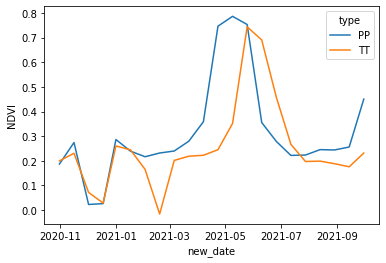

In [18]:
sns.lineplot(data = year_annual_NDVI_sample, x = 'new_date',y = 'NDVI', hue = 'type')

In [19]:
year_annual_NDVI_sample

,new_date,type,NDVI
138,2020-10-31,PP,0.1869
139,2020-10-31,TT,0.1998
140,2020-11-16,PP,0.2743
141,2020-11-16,TT,0.2306
142,2020-12-02,PP,0.0229
143,2020-12-02,TT,0.0718
144,2020-12-18,TT,0.0284
145,2020-12-18,PP,0.0264
146,2021-01-01,PP,0.2864
147,2021-01-01,TT,0.2603


In [21]:
year_weather_sample

,new_date,mean_temperature,sum_percepetation
1142,2020-10-31,14.3500,0.3
1143,2020-11-01,15.6375,0.1
1144,2020-11-02,13.6125,0.0
1145,2020-11-03,14.4125,0.0
1146,2020-11-04,10.7000,0.0
...,...,...,...
1574,2021-10-11,11.8875,0.0
1575,2021-10-12,13.4500,0.0
1576,2021-10-13,14.5500,0.1
1577,2021-10-14,15.3625,0.0
